<a href="https://colab.research.google.com/github/HarikrishnanK9/DataSymphony/blob/main/Student_Performance_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ABOUT THE DATASET**


The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.


* **Hours Studied**: The total number of hours spent studying by each student.
* **Previous Scores**: The scores obtained by students in previous tests.
* **Extracurricular Activities**: Whether the student participates in
  extracurricular activities (Yes or No).
* **Sleep Hours**: The average number of hours of sleep the student had per day.
* **Sample Question Papers Practiced**: The number of sample question papers the student practiced.
* **Performance Index**: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.




**IMPORTING NECESSARY LIBRARIES**

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


**LOADING THE DATASET**

In [89]:
df=pd.read_csv("/content/Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


**PREPROCESSING**

In [90]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [91]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [92]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [93]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [94]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [96]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


**DATA CLEANING**

In [97]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [98]:
df.duplicated().sum()

127

In [99]:
df.drop_duplicates(inplace=True)

In [100]:
df.shape

(9873, 6)

**CHECKING FOR OUTLIERS**

<Axes: >

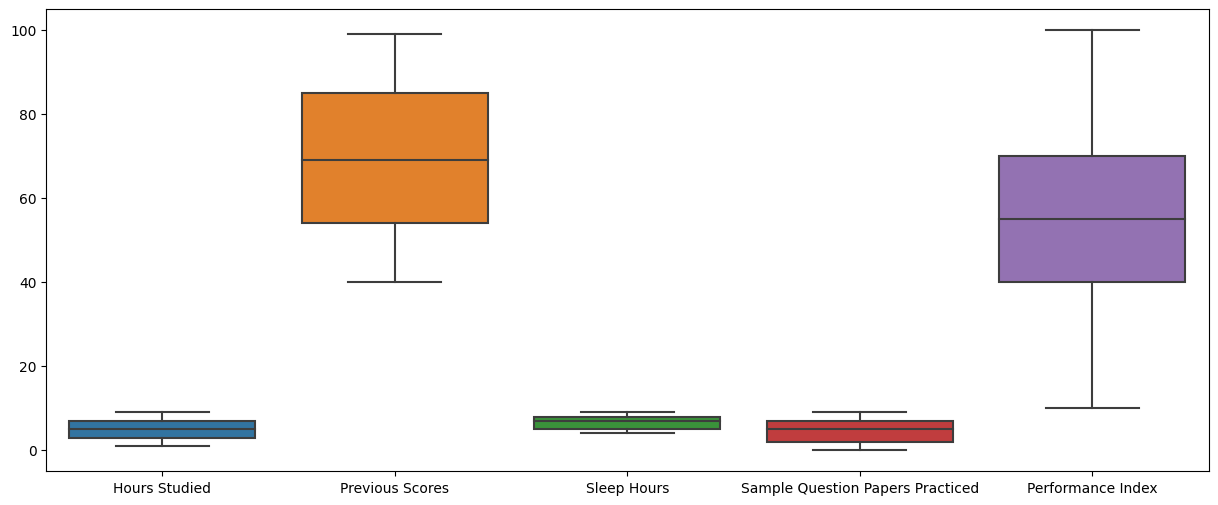

In [101]:
plt.figure(figsize=(15, 6))
sns.boxplot(df)

**Observation**:From the figure its clear that data set is free from outliers.

**DATA VISUALIZATION**

**Checking whether extracurricular activities have any impact on determining one's Performance Index.**

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

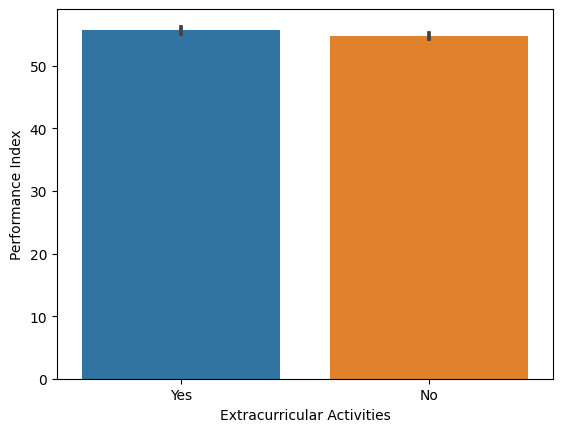

In [102]:
sns.barplot(x='Extracurricular Activities', y='Performance Index', data=df)

Extracting data of students who put maximum effort in their studies then checking the same,impact of extracurricular activities in performance index

In [103]:
max_effort=df.loc[(df["Hours Studied"]>=7)&(df["Previous Scores"]>=85)&(df["Performance Index"]>=80)&(df["Sample Question Papers Practiced"]>7)]
max_effort

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
79,8,93,Yes,6,9,88.0
115,7,90,Yes,4,8,82.0
142,8,96,No,8,9,94.0
297,7,90,Yes,8,9,82.0
310,8,91,No,5,8,86.0
...,...,...,...,...,...,...
9648,9,98,No,5,9,93.0
9866,8,94,Yes,7,8,89.0
9922,9,94,Yes,7,8,91.0
9931,8,86,No,4,8,81.0


<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

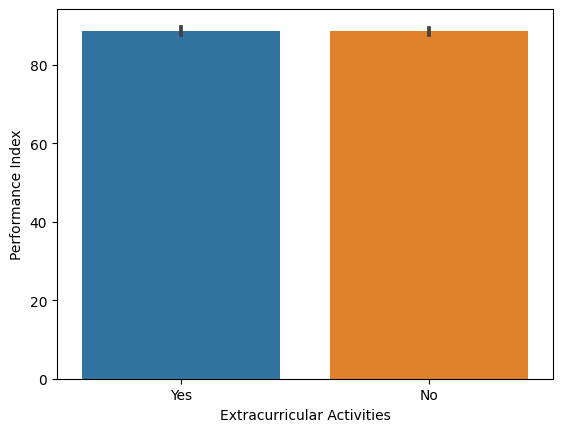

In [104]:
sns.barplot(x="Extracurricular Activities",y="Performance Index",data=max_effort)

Extracting data of students who exert minimal effort in their studies, then analyzing how extracurricular activities relate to their performance index.

In [105]:
minimal_effort=df.loc[(df["Hours Studied"]<=3)&(df["Previous Scores"]<=54)&(df["Performance Index"]<40)&(df["Sample Question Papers Practiced"]<=2)]
minimal_effort

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
12,3,47,No,9,2,27.0
46,1,43,Yes,7,0,17.0
77,3,54,Yes,5,0,35.0
89,2,52,No,9,0,29.0
157,1,52,No,5,2,26.0
...,...,...,...,...,...,...
9747,1,50,Yes,4,1,23.0
9818,3,43,Yes,9,0,25.0
9916,2,43,Yes,6,1,17.0
9920,3,52,No,7,1,32.0


<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

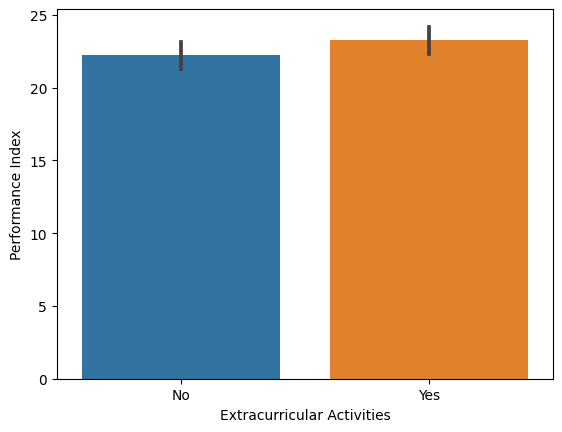

In [106]:
sns.barplot(x="Extracurricular Activities",y="Performance Index",data=minimal_effort)

**Observation:** Half of the students in this dataset are involved in some form of extracurricular activities, while the other half are not engaged in any activities. The figures also indicate that the Performance Index does not depend on whether one participates in extracurricular activities or not. After examining students who dedicate varying levels of effort to their studies and plotting the graphs once again, no significant advantage was found for individuals with extracurricular activities in the Performance Index .

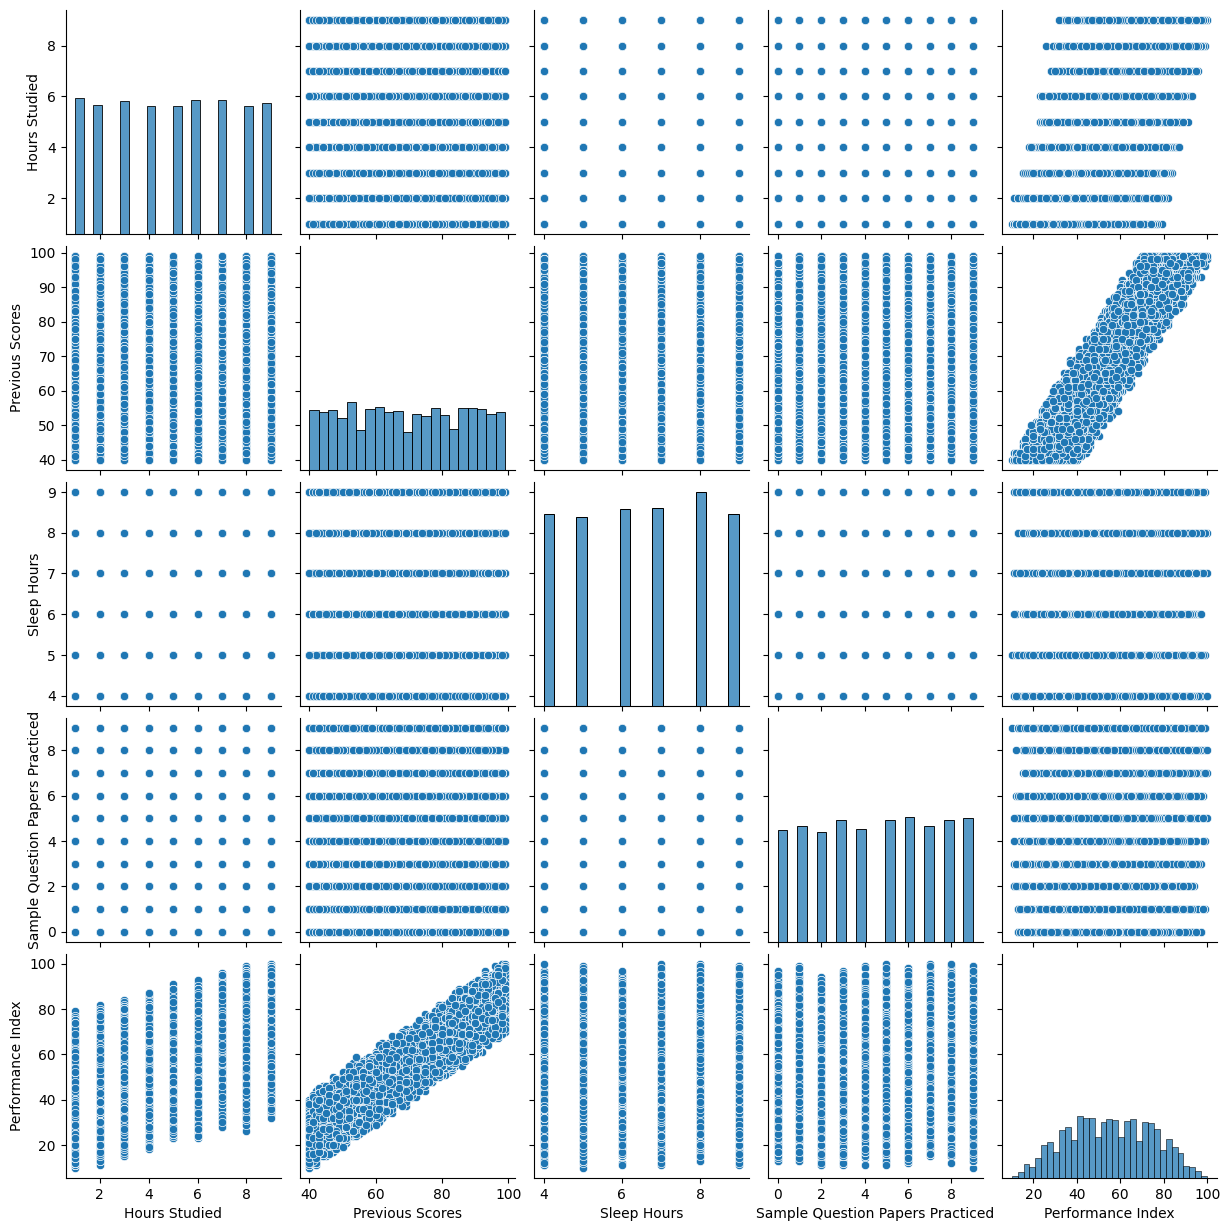

In [107]:
sns.pairplot(df)

**Observation**:Previous scores are strongly correlated with Performance Index

Visualizing the Specific Distributions from Pairplot findings

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

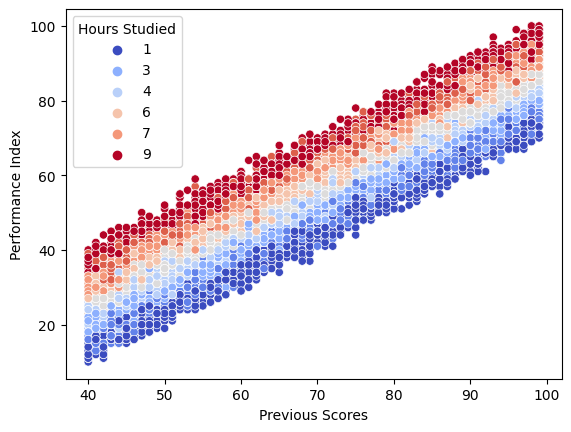

In [108]:
sns.scatterplot(df,x ='Previous Scores',y ='Performance Index', hue = df['Hours Studied'], palette = 'coolwarm', )

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

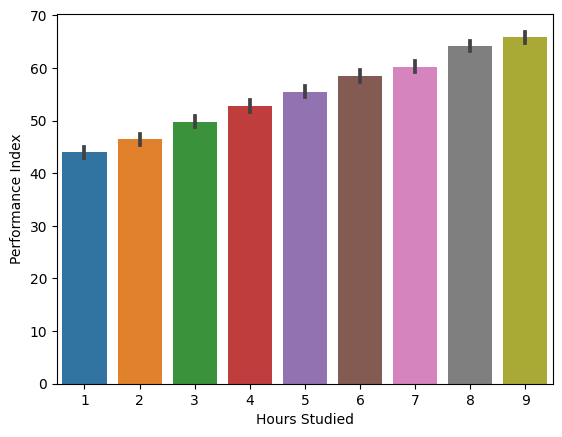

In [109]:
sns.barplot(x="Hours Studied",y="Performance Index",data=df)

In [110]:
df['Extracurricular Activities']=df['Extracurricular Activities'].replace(['Yes','No'],[1,0])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


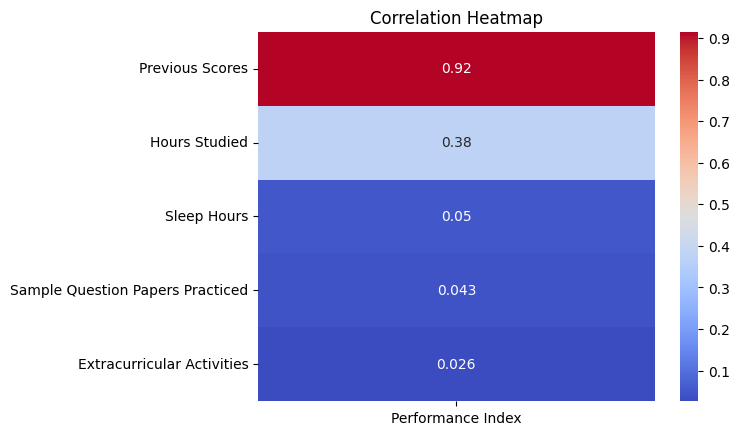

In [111]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix['Performance Index'].drop('Performance Index').sort_values(ascending=False).to_frame(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Observation**:Previous scores shows strong correlation with performance index,Then Hours studied also shows a positive correlation with performance Index.Previous pairplot results as well as scatterplot results also reveals the same result as shown in the heatmap.

**SPLITTING DEPENDENT AND INDEPENDENT VARIABLES**

In [112]:
X=df.iloc[:,:-1]
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [113]:
y=df.iloc[:,-1]
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 9873, dtype: float64

**TRAIN TEST SPLIT**

*   Split ratio:70%train and 30%test
*   Random state=42



In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape,X_test.shape

((6911, 5), (2962, 5))

In [115]:
y_train.shape,y_test.shape

((6911,), (2962,))

**IMPLEMENTING DIFFERENT MODELS & EVALUATING PERFORMANCE**

**Model 1:Linear Regression**

In [116]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred

array([46.47091936, 80.24923008, 61.02996578, ..., 29.51491428,
       51.34505597, 64.87860811])

*Error Calculation*

In [117]:
dfe=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Error':y_test-y_pred})
dfe

,Actual Value,Predicted Value,Error
6099,47.0,46.470919,0.529081
106,76.0,80.249230,-4.249230
9265,62.0,61.029966,0.970034
4707,23.0,22.732038,0.267962
2155,76.0,74.839305,1.160695
...,...,...,...
4442,78.0,75.697411,2.302589
9458,47.0,46.244763,0.755237
5878,30.0,29.514914,0.485086
2638,52.0,51.345056,0.654944


<Axes: xlabel='Actual Value', ylabel='Predicted Value'>

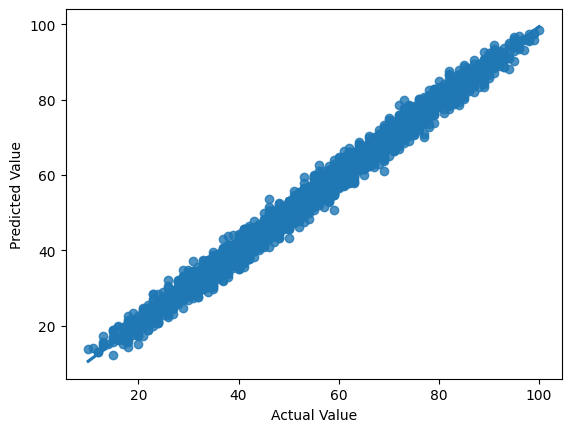

In [118]:
sns.regplot(x="Actual Value",y="Predicted Value",data=dfe)

**Observation:**the dots are tightly close to the line, it means that the predicted values are very close to the actual values, and the model is performing well in making accurate predictions

In [119]:
print('intercept is',lr.intercept_)
print('slope is',lr.coef_)
list(zip(X_train,lr.coef_))

intercept is -33.96701551454478
slope is [2.84924135 1.01823681 0.55684553 0.4700014  0.19339224]


[('Hours Studied', 2.849241345157234),
 ('Previous Scores', 1.0182368091747374),
 ('Extracurricular Activities', 0.5568455254314689),
 ('Sleep Hours', 0.4700013984102461),
 ('Sample Question Papers Practiced', 0.1933922378847044)]

**SAMPLE PREDICTION**

In [120]:
print(lr.predict([[8,99,1,9,1]]))

[94.6126097]


In [121]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))


Mean Absolute Error: 1.6461997455341877
Mean Absolute Percentage Error: 0.03491776142663015
Mean Squared Error: 4.326180232071975
Root Mean Squared Error: 2.079947170500245
R2 Score: 0.9881593003934889


**Observation:**MAE is relatively low,MAPE is also relatively low.MSE is higher than MAE and MAPE but relatively low.R2 score is 0.988!! value is nearly 1.The results suggests that the model performs well with relatively low errors and a higher r2 score.

**Model2:Decision Tree**

In [122]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred1=dtr.predict(X_test)
y_pred1

array([47., 80., 61., ..., 24., 52., 67.])

**SAMPLE PREDICTING**

In [123]:
print(dtr.predict([[8,99,1,9,1]]))

[97.]


In [124]:
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred1))
print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test,y_pred1))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred1))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2 Score:",r2_score(y_test,y_pred1))

Mean Absolute Error: 2.4422687373396355
Mean Absolute Percentage Error: 0.051879278843587714
Mean Squared Error: 9.421336934503714
Root Mean Squared Error: 3.0694196413171846
R2 Score: 0.9742139220862375


MAE is relatively low,MAPE is also relatively low.MSE is higher than MAE and MAPE but stil relatively low.R2 score is 0.97 is also nearly 1.The results suggests that the model is performing reasonably well with relativly low errors and a high r2 score.

**Model3:RandomForest**

In [125]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred2=rfr.predict(X_test)
y_pred2

array([46.705 , 81.39  , 60.67  , ..., 25.4715, 52.02  , 65.15  ])

**SAMPLE PREDICTING**

In [126]:
print(rfr.predict([[8,99,1,9,1]]))

[95.62]


In [127]:
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred2))
print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test,y_pred2))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred2))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred2)))
print("R2 Score:",r2_score(y_test,y_pred2))

Mean Absolute Error: 1.8867547091197499
Mean Absolute Percentage Error: 0.0401204410878586
Mean Squared Error: 5.598107167318787
Root Mean Squared Error: 2.3660319455406316
R2 Score: 0.9846780527445728


MAE is relatively low,MAPE is also relatively low,But MSE is higher than MAE and MAPE but its also relatively low.R2 score is 0.98! nearly 1.Once again these results suggests that the model performs well with low error and a high r2 score.

**COMPARISON**

In [128]:
dic={'Model':['Linear Regression','Decision Tree','Random Forest'],
     'MAE':[1.646,2.433,1.885],'MAPE':[0.035,0.051,0.040],
     'MSE':[4.326,9.360,5.626],'RMSE':[2.078,3.059,2.372],
     'R2Score':[0.988,0.974,0.984]}
result=pd.DataFrame(dic)
print(result)

               Model    MAE   MAPE    MSE   RMSE  R2Score
0  Linear Regression  1.646  0.035  4.326  2.078    0.988
1      Decision Tree  2.433  0.051  9.360  3.059    0.974
2      Random Forest  1.885  0.040  5.626  2.372    0.984


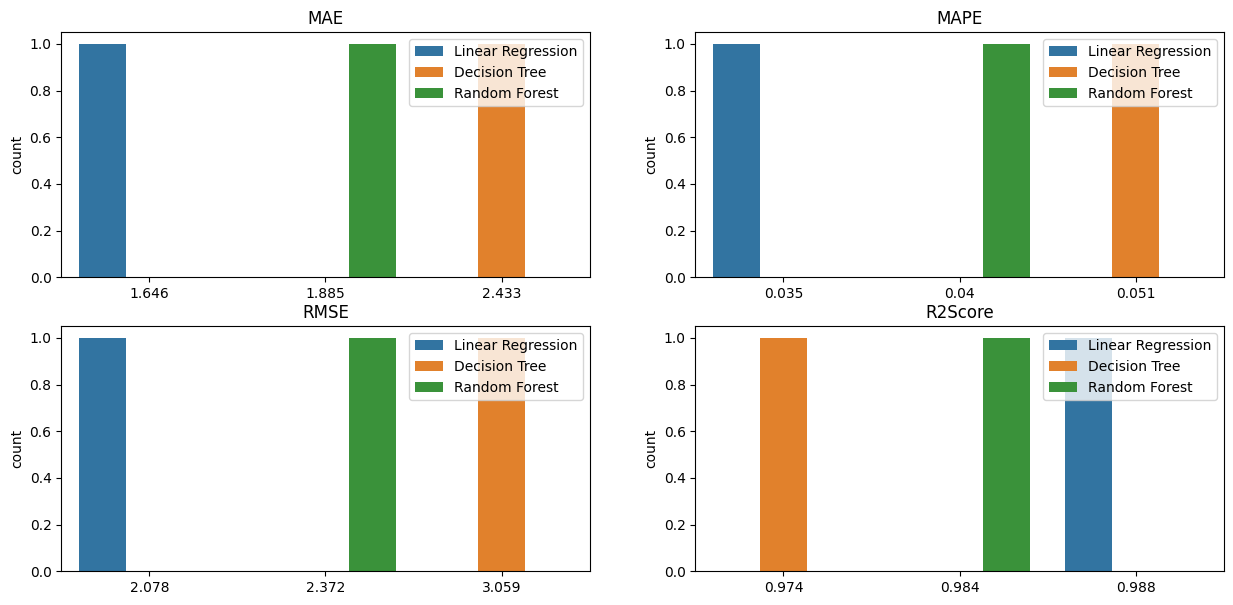

In [129]:
fig, subplots_array = plt.subplots(2, 2, figsize=(15, 7))

sns.countplot(x='MAE',hue='Model', data=dic, ax=subplots_array[0, 0])
subplots_array[0, 0].set_title('MAE')

sns.countplot(x='MAPE',hue='Model', data=dic, ax=subplots_array[0, 1])
subplots_array[0, 1].set_title('MAPE')

sns.countplot(x='RMSE',hue='Model', data=dic, ax=subplots_array[1, 0])
subplots_array[1, 0].set_title('RMSE')

sns.countplot(x='R2Score',hue='Model', data=dic, ax=subplots_array[1, 1])
subplots_array[1, 1].set_title('R2Score')

plt.show()

**CONCLUSION**

From the three regression models, it's evident that linear regression is the optimal model for this dataset, as it exhibits the lowest errors and the highest R2 score. As the error values increase, the R2 score decreases.